### RNN(Reccurent Neural Networks)
<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*EeRwi4cBjHyBuhmoR7IGYw.png" width="500" alt="Example Image"/>
    <p>이미지 출처: <a href="https://medium.com">medium</a></p>
</div>

- 시계열, 자연어, 순서가 있는 경우 이전의 정보를 다음 입력으로 사용
- 시퀀스 데이터 처리에 특화
- 순서(Sequence) 정보가 중요하다
- 음성, 자연어, 시간 순서 데이터 등이 있다
- 하나의 은닉층이 순차적으로 여러번 반복해서 사용된다.


### 시퀀스 데이터
- 텍스트 : 단어들의 시퀀스
    - 단어들의 문맥
    - 단어간의 관계 정보
    - 어떤 단어로 어떤 순서로 언제 사용되었는지에 대한 정보 추출 용이
- 비디오 : 이미지의 시퀀스

### RNN과 FNN 모델의 차이점
- 정보의 흐름
    - FNN
        - 각 입력이 독립적
        - 입력간의 시간적 순서가 고려되지 않음
    - RNN
        - 입력 데이터들 끼리의 **시간적 순서**를 내부적으로 모델링
        - 시퀀스 **전체 정보**를 고려한 처리
- 상태의 보존
    - FNN : 상태 보존 없음
    - RNN : 시간에 따른 상태(**hidden state**)를 보존 하여 이전 정보 참조

### RNN을 사용한 텍스트 분석

- 언어 모형 : LM (Language Model), 분류(감성 분석), 기계 번역 등에 사용 <br>
    여러 개의 단어들이 동시 출현 확률, 특정 단어가 주어질 때 그 다음 단어가 무엇인지 예측<br>
    일련의 **단어들의 확률 분포(Softmax Function)** <br>
    문장에서의 단어 시퀀스 (빈칸 채우기) <br>
    
- I **like** the movie, the movie is _____. 에서 RNN 사용. 빈칸의 단어를 유추한다

### 시작 토큰 및 종료 토큰

- 시작 토큰 : 각 시퀀스의 시작점을 알림
- 종료 토큰 : 각 시퀀스의 종료점을 알림

### RNN 순서

1. 각 단어를 임베딩 벡터로 변환<br>
    `model.add(layers.Embedding(max_features, 64, input_length=max_len))`
2. RNN 층<br>
    `model.add(layers.SimpleRNN(32, activation='tanh', return_sequences=False))`
    - timestep 0 
    ![time step 1](https://img.notionusercontent.com/s3/prod-files-secure%2Fe8f11927-b70c-4524-9227-a3efac08e7aa%2F0a5edad9-b7f5-470a-bfb3-f72a225cf083%2FUntitled.png/size/w=2000?exp=1729409127&sig=6viU4yksmEXlApJ-lTehpxHBnBUiyLPemVrIaWCv6-Q)

        1. 임베딩 으로 변환된 0 번째 단어를 RNN 층으로 연산
            1. RNN층의 각 노드와 연산한다. $h_0, h_1 … h_j$
        2. 각 임베딩 벡터와 연산 된 결과를 hidden state 0 벡터안의 요소로 넣는다
            
            $$
            h_{\{time \space step\}, \{node \space number \}}
            $$
            
            $\text{hidden state vec}_0 = (h_{0,1}, h_{0,1}, … h_{0,j})$ - 0 번째 time step 의 히든 스테이트 벡터

    - time step 1 의 단계

        ![time step 1](https://img.notionusercontent.com/s3/prod-files-secure%2Fe8f11927-b70c-4524-9227-a3efac08e7aa%2F926496ba-b643-4afb-8277-04bbe7e22056%2FUntitled.png/size/w=2000?exp=1729409298&sig=ewf9oPX2yuOWl00mZNTnaqkWng71pZJk-Dan5kjSa10)

        1. 다음 인덱스의 단어 임베딩과 이전 층의 hidden state 를 concat 한다.
        2. 만약 movie 의 임베딩(64 차원)이 $[e_{movie0},e_{movie1},e_{movie2}...e_{movie63}]$ 라면<br>
            RNN 에 입력값은 아래와 같다. 즉 입력값의 차원은 (64 + j) 가 된다.
            $$
            [e_{movie0},e_{movie1},e_{movie2}...e_{movie63},h_{0,1}, h_{0,1}, … h_{0,j} ]
            $$

    - time step 2 이상부터는 time step 1 과정과 동일하다 그리고 마지막 step 에서 종결되고, 그 후 dense layer 쪽으로 출력된다 (FNN)
    - 이후 문제에 따라 정답 라벨을 예측한다
    - 주의 할 점 : 단어 하나가 들어가는 것이 아니라 시퀀스 단위로 입력된다.

### Return Sequence True 파라미터
- True : 모든 hidden state를 넘겨준다.
- False : 마지막 hidden state 벡터만을 다음층에 넘겨준다.
- 출력 형태 :
    - False = `(batch_size, output_dim)`
    - True = `(batch_size, time steps,output_dim)`

In [3]:
import numpy as np
from tensorflow.keras import layers

embeded_sequence = np.array([
    [ # 시퀀스의 예시
        [0.1, 4.2, 1.5, 1.1, 2.8], # the
        [1.0, 3.1, 2.5, 0.7, 1.1], # movie
        [0.3, 2.1, 1.5, 2.1, 0.1], # is
        [2.2, 1.4, 0.5, 0.9, 1.1]  # fun
    ]], dtype=np.float32)

rnn_rs_true = layers.SimpleRNN(3, return_sequences=True, return_state=True)
rnn_rs_false = layers.SimpleRNN(3, return_sequences=False, return_state=True)

print("마지막 층의 hidden state vector를 보여준다")
hidden_state, _ = rnn_rs_false(embeded_sequence)
print(hidden_state, end="\n\n")

hidden_states, _ = rnn_rs_true(embeded_sequence)
print("모든 층의 hiddne state vector를 보여준다")
print(hidden_states)

마지막 층의 hidden state vector를 보여준다
tf.Tensor([[-0.629878    0.99993676  0.82912433]], shape=(1, 3), dtype=float32)

모든 층의 hiddne state vector를 보여준다
tf.Tensor(
[[[-0.86835545  0.45163512  0.671799  ]
  [-0.67421705  0.83637017 -0.65464187]
  [-0.9896213  -0.17951797  0.1286124 ]
  [ 0.6252765   0.84835863 -0.33315915]]], shape=(1, 4, 3), dtype=float32)


### imdb data 실습(return_seq_true with concat)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop

max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
max_len = 100

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           640000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 100, 32)           3104      
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 16)                51216     
                                                                 
 dense_7 (Dense)             (None, 2)                 34        
                                                                 
Total params: 694,354
Trainable params: 694,354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 21s 117ms/step - loss: 0.4992 - acc: 0.7433 - val_loss: 0.4754 - val_acc: 0.7712
Epoch 2/10
157/157 [==============================] - 18s 112ms/step - loss: 0.2788 - acc: 0.8862 - val_loss: 0.3933 - val_acc: 0.8336
Epoch 3/10
157/157 [==============================] - 18s 114ms/step - loss: 0.1320 - acc: 0.9535 - val_loss: 0.4922 - val_acc: 0.8094
Epoch 4/10
157/157 [==============================] - 19s 123ms/step - loss: 0.0377 - acc: 0.9900 - val_loss: 0.7111 - val_acc: 0.8020
Epoch 5/10
157/157 [==============================] - 17s 111ms/step - loss: 0.0110 - acc: 0.9969 - val_loss: 0.8678 - val_acc: 0.7948
Epoch 6/10
157/157 [==============================] - 18s 112ms/step - loss: 0.0053 - acc: 0.9984 - val_loss: 1.0049 - val_acc: 0.7894
Epoch 7/10
157/157 [==============================] - 18s 113ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 1.1367 - val_acc: 0.7994
Epoch 8/10
157/157 [==============================] - 1

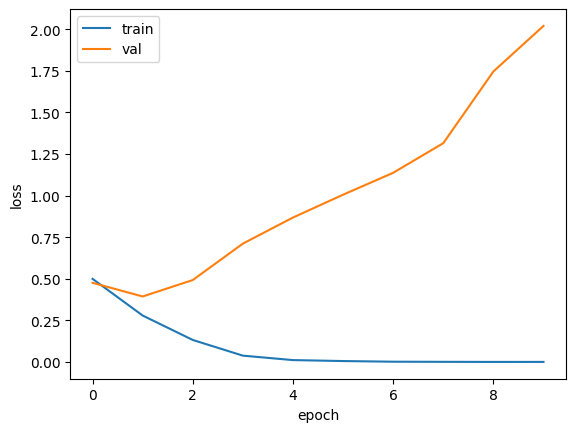

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

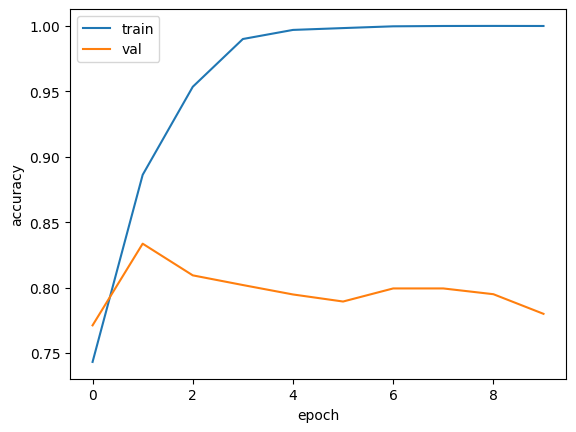

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 14s 18ms/step - loss: 1.9559 - acc: 0.7840


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.7839999794960022


### imdb data 실습(return_seq_true with mean)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Embedding, LSTM, SimpleRNN, Dense, Lambda
from tensorflow.keras.models import Model

In [ ]:
# 데이터의 전처리
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

```py
return_sequences=True
tf.math.reduce_mean(x, axis=1)

# ex
tf.math.reduce_mean([[1.,2.,2.],[2.,2.,3.]], axis=1)
>>>1.6666666, 2.3333333
```

In [ ]:
main_input = Input(shape=(max_len,), dtype='int32')
# 단어의 임베딩 64차원
x = Embedding(output_dim=64, input_dim=max_features, input_length=max_len)(main_input)

# RNN 을 거치면서 32차원으로 줄어든다.
# True 로 줬기 때문에 모든 히든스테이트를 다음층으로 보낸다.
RNN_out = SimpleRNN(32, return_sequences=True)(x)
# 여기서의 출력은 (batchsize, hidden State ,32)

# 각 hidden state 별 32 개의 값의 평균을 구해 넣는다
# 즉, 각 단어의 32 개의 히든 스테이트의 평균

out = Lambda(lambda x: tf.math.reduce_mean(x, axis=1))(RNN_out)
# 출력 겂은 (batch size, 32)

In [ ]:
x = Dense(16, activation='relu')(out)
main_output = Dense(2, activation='softmax')(x)
model = Model(inputs=main_input,outputs=main_output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100, 32)           3104      
                                                                 
 lambda_1 (Lambda)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 643,666
Trainable params: 643,666
Non-trainable

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 31ms/step - loss: 0.5251 - acc: 0.7483 - val_loss: 0.4280 - val_acc: 0.8040
Epoch 2/10
157/157 [==============================] - 5s 31ms/step - loss: 0.3335 - acc: 0.8622 - val_loss: 0.3779 - val_acc: 0.8332
Epoch 3/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2702 - acc: 0.8942 - val_loss: 0.4058 - val_acc: 0.8346
Epoch 4/10
157/157 [==============================] - 5s 29ms/step - loss: 0.2361 - acc: 0.9088 - val_loss: 0.3821 - val_acc: 0.8336
Epoch 5/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2091 - acc: 0.9207 - val_loss: 0.4396 - val_acc: 0.8222
Epoch 6/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1851 - acc: 0.9327 - val_loss: 0.4594 - val_acc: 0.8288
Epoch 7/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1647 - acc: 0.9408 - val_loss: 0.4827 - val_acc: 0.8156
Epoch 8/10
157/157 [==============================] - 4s 28ms/step - 

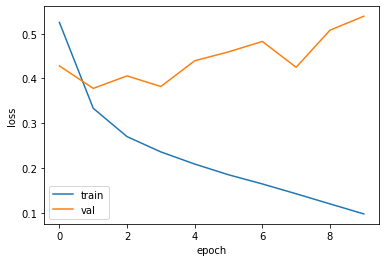

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

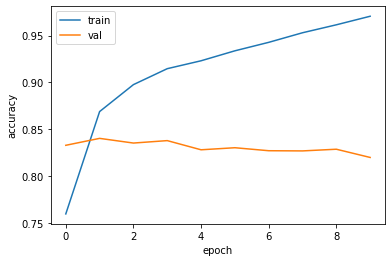

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 4s 5ms/step - loss: 0.5652 - acc: 0.8179


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.8178799748420715
